## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/abecklas/fifa-world-cup

### Descrição:
---
> A Copa do Mundo FIFA é uma competição global de futebol disputada por vários países do mundo que jogam futebol. É disputado a cada quatro anos e é o troféu mais prestigioso e importante da modalidade.

### Conteúdo:
---
> O conjunto de dados das Copas do Mundo mostra todas as informações sobre todas as Copas do Mundo da história, enquanto o conjunto de dados das partidas da Copa do Mundo mostra todos os resultados das partidas disputadas como parte da copa

### Reconhecimentos:
---
> Estes dados são cortesia do site FIFA World Cup Archive

### Inspiração:
---
> Você consegue prever quem vai ganhar a próxima Copa do Mundo?

In [18]:
# Importando as bibliotecas e o dataset
import pandas as pd

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
#from sklearn.cross_validation import train_test_split
#from sklearn.utils import shuffle
#from sklearn.grid_search import GridSearchCV
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.svm import SVC
#from sklearn.externals import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import numpy as np
import warnings #comando para importar e tratar erros do Anaconda
warnings.filterwarnings(action = 'once') 
import pickle




In [5]:
partidas = pd.read_csv('WorldCupMatches.csv')
jogadores = pd.read_csv('WorldCupPlayers.csv')
copas = pd.read_csv('WorldCups.csv')

 ## Visualizar os dados
 ---

In [6]:
#1) Copas
copas

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [7]:
copas.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [8]:
copas.columns = ['Ano', 'Sede', 'Vencedores', 'Vices', 'TerceiroLugar', 'QuartoLugar', 'Gols', 'Selecoes','Jogos', 'Público' ]

In [9]:
copas

,Ano,Sede,Vencedores,Vices,TerceiroLugar,QuartoLugar,Gols,Selecoes,Jogos,Público
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [10]:
# Partidas

partidas

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
partidas.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [12]:

partidas.columns = ['Ano', 'Dia do Jogo', 'Fase', 'Estadio', 'Cidade', 'Time1', 'GolTime1', 'GolTime2', 'Time2', 'Condicoes', 'publico', 'GolsCasaIntervalo', 'GolsIntervalo','Juiz', 'Assistente1', 'Assistente2', 'RodadaID', 'PartidaID', 'SiglasAnfitriao', 'SiglasVisitante']
partidas

,Ano,Dia do Jogo,Fase,Estadio,Cidade,Time1,GolTime1,GolTime2,Time2,Condicoes,publico,GolsCasaIntervalo,GolsIntervalo,Juiz,Assistente1,Assistente2,RodadaID,PartidaID,SiglasAnfitriao,SiglasVisitante
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
jogadores

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [14]:
jogadores.columns
jogadores.columns = ['RodadaID', 'PartidaID', 'Selecao', 'Treinador', 'Line-up', 'CamisaNumero', 'JogadorPrincipal', 'Posição', 'Evento']
jogadores

,RodadaID,PartidaID,Selecao,Treinador,Line-up,CamisaNumero,JogadorPrincipal,Posição,Evento
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


## Verificando o tamanho dos dataset
---

In [19]:
tcopa = copas.shape
tpartida = partidas.shape
tjogadores = jogadores.shape
print(f"""

Para nossa analise, primeiramente informamos o tamanho de nossos dataset's:

1 - DataSet - COPA - {tcopa}
2 - DataSet - PARTIDA - {tpartida}
3 - DataSet - JOGADORES - {tjogadores}

"""

)




Para nossa analise, primeiramente informamos o tamanho de nossos dataset's:

1 - DataSet - COPA - (20, 10)
2 - DataSet - PARTIDA - (4572, 20)
3 - DataSet - JOGADORES - (37784, 9)




C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

> Maior vencedor

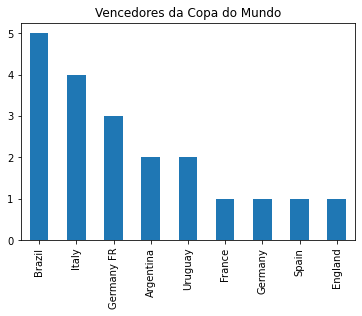

In [20]:


Paisvencedor = copas['Vencedores'].value_counts(sort=True)
Paisvencedor.plot(kind='bar', title = 'Vencedores da Copa do Mundo')
plt.show()

## Analise Exploratória
---

In [21]:
copas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ano            20 non-null     int64 
 1   Sede           20 non-null     object
 2   Vencedores     20 non-null     object
 3   Vices          20 non-null     object
 4   TerceiroLugar  20 non-null     object
 5   QuartoLugar    20 non-null     object
 6   Gols           20 non-null     int64 
 7   Selecoes       20 non-null     int64 
 8   Jogos          20 non-null     int64 
 9   Público        20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [22]:
copas.head(5).T

,0,1,2,3,4
Ano,1930,1934,1938,1950,1954
Sede,Uruguay,Italy,France,Brazil,Switzerland
Vencedores,Uruguay,Italy,Italy,Uruguay,Germany FR
Vices,Argentina,Czechoslovakia,Hungary,Brazil,Hungary
TerceiroLugar,USA,Germany,Brazil,Sweden,Austria
QuartoLugar,Yugoslavia,Austria,Sweden,Spain,Uruguay
Gols,70,70,84,88,140
Selecoes,13,16,15,13,16
Jogos,18,17,18,22,26
Público,590.549,363.000,375.700,1.045.246,768.607


In [23]:
partidas.info()

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ano                852 non-null    float64
 1   Dia do Jogo        852 non-null    object 
 2   Fase               852 non-null    object 
 3   Estadio            852 non-null    object 
 4   Cidade             852 non-null    object 
 5   Time1              852 non-null    object 
 6   GolTime1           852 non-null    float64
 7   GolTime2           852 non-null    float64
 8   Time2              852 non-null    object 
 9   Condicoes          852 non-null    object 
 10  publico            850 non-null    float64
 11  GolsCasaIntervalo  852 non-null    float64
 12  GolsIntervalo      852 non-null    float64
 13  Juiz               852 non-null    object 
 14  Assistente1        852 non-null    object 
 15  Assistente2        852 non-null    object 
 16  RodadaID           852 n

In [24]:
partidas.sample(5).T

,2723,594,82,1686,3712
Ano,NaN,2002,1954,NaN,NaN
Dia do Jogo,NaN,05 Jun 2002 - 15:30,17 Jun 1954 - 17:50,NaN,NaN
Fase,NaN,Group H,Group 4,NaN,NaN
Estadio,NaN,Kobe Wing Stadium,La Pontaise,NaN,NaN
Cidade,NaN,Kobe,Lausanne,NaN,NaN
Time1,NaN,Russia,Switzerland,NaN,NaN
GolTime1,NaN,2,2,NaN,NaN
GolTime2,NaN,0,1,NaN,NaN
Time2,NaN,Tunisia,Italy,NaN,NaN
Condicoes,NaN,,,NaN,NaN


In [25]:
# Excluindo os nulos

partidas.dropna(how = 'all', inplace=True)
partidas.info()

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ano                852 non-null    float64
 1   Dia do Jogo        852 non-null    object 
 2   Fase               852 non-null    object 
 3   Estadio            852 non-null    object 
 4   Cidade             852 non-null    object 
 5   Time1              852 non-null    object 
 6   GolTime1           852 non-null    float64
 7   GolTime2           852 non-null    float64
 8   Time2              852 non-null    object 
 9   Condicoes          852 non-null    object 
 10  publico            850 non-null    float64
 11  GolsCasaIntervalo  852 non-null    float64
 12  GolsIntervalo      852 non-null    float64
 13  Juiz               852 non-null    object 
 14  Assistente1        852 non-null    object 
 15  Assistente2        852 non-null    object 
 16  RodadaID           852 non

In [26]:
# verificando as duas partidas com publico
partidas[partidas['publico'].isnull()]

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ano,Dia do Jogo,Fase,Estadio,Cidade,Time1,GolTime1,GolTime2,Time2,Condicoes,publico,GolsCasaIntervalo,GolsIntervalo,Juiz,Assistente1,Assistente2,RodadaID,PartidaID,SiglasAnfitriao,SiglasVisitante
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


In [27]:
partidas.head()

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ano,Dia do Jogo,Fase,Estadio,Cidade,Time1,GolTime1,GolTime2,Time2,Condicoes,publico,GolsCasaIntervalo,GolsIntervalo,Juiz,Assistente1,Assistente2,RodadaID,PartidaID,SiglasAnfitriao,SiglasVisitante
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [28]:
partidas['PartidaID'].value_counts()


C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


300186501.0    2
300186490.0    2
300186508.0    2
300186474.0    2
300186504.0    2
              ..
395.0          1
1990.0         1
265.0          1
300061500.0    1
1096.0         1
Name: PartidaID, Length: 836, dtype: int64

In [29]:
partidas[partidas['PartidaID'] == 300186490.0] 

,Ano,Dia do Jogo,Fase,Estadio,Cidade,Time1,GolTime1,GolTime2,Time2,Condicoes,publico,GolsCasaIntervalo,GolsIntervalo,Juiz,Assistente1,Assistente2,RodadaID,PartidaID,SiglasAnfitriao,SiglasVisitante
829,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG


In [30]:
partidas.duplicated()

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      False
1      False
2      False
3      False
4      False
       ...  
847     True
848     True
849     True
850     True
851     True
Length: 852, dtype: bool

In [31]:
partidas[partidas.duplicated(keep=False)]

,Ano,Dia do Jogo,Fase,Estadio,Cidade,Time1,GolTime1,GolTime2,Time2,Condicoes,publico,GolsCasaIntervalo,GolsIntervalo,Juiz,Assistente1,Assistente2,RodadaID,PartidaID,SiglasAnfitriao,SiglasVisitante
820,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
821,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
822,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
824,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
825,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
826,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
827,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
828,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG
829,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG


In [32]:
partidas.drop_duplicates(inplace=True)
partidas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ano                836 non-null    float64
 1   Dia do Jogo        836 non-null    object 
 2   Fase               836 non-null    object 
 3   Estadio            836 non-null    object 
 4   Cidade             836 non-null    object 
 5   Time1              836 non-null    object 
 6   GolTime1           836 non-null    float64
 7   GolTime2           836 non-null    float64
 8   Time2              836 non-null    object 
 9   Condicoes          836 non-null    object 
 10  publico            835 non-null    float64
 11  GolsCasaIntervalo  836 non-null    float64
 12  GolsIntervalo      836 non-null    float64
 13  Juiz               836 non-null    object 
 14  Assistente1        836 non-null    object 
 15  Assistente2        836 non-null    object 
 16  RodadaID           836 non

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
partidas['Ano'].value_counts()

1998.0    64
2002.0    64
2014.0    64
2006.0    64
2010.0    64
1982.0    52
1994.0    52
1990.0    52
1986.0    52
1978.0    38
1974.0    38
1958.0    35
1962.0    32
1966.0    32
1970.0    32
1954.0    26
1950.0    22
1938.0    18
1930.0    18
1934.0    17
Name: Ano, dtype: int64

In [34]:
partidas.describe()

,Ano,GolTime1,GolTime2,publico,GolsCasaIntervalo,GolsIntervalo,RodadaID,PartidaID
count,836.000000,836.000000,836.000000,835.000000,836.000000,836.000000,8.360000e+02,8.360000e+02
mean,1984.535885,1.824163,1.021531,44859.457485,0.718900,0.427033,1.086093e+07,5.677577e+07
std,22.299860,1.619178,1.072024,23551.107893,0.941995,0.675091,2.751802e+07,1.070329e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,29800.000000,0.000000,0.000000,2.620000e+02,1.183500e+03
50%,1990.000000,2.000000,1.000000,41000.000000,0.000000,0.000000,3.370000e+02,2.113500e+03
75%,2002.000000,3.000000,2.000000,61009.000000,1.000000,1.000000,2.497220e+05,4.395005e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [35]:
# Nova coluna de total de Gols somando os gols do time 1 com os do time 2
partidas['Gols Total'] = partidas['GolTime1'] + partidas['GolTime2']


C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
print('Os 5 jogos que mais tiveram quantidades de gol na Copa do Mundo')
partidas.nlargest(5, 'Gols Total').T


Os 5 jogos que mais tiveram quantidades de gol na Copa do Mundo


,94,40,87,312,105
Ano,1954,1938,1954,1982,1958
Dia do Jogo,26 Jun 1954 - 17:00,05 Jun 1938 - 17:30,20 Jun 1954 - 16:50,15 Jun 1982 - 21:00,08 Jun 1958 - 19:00
Fase,Quarter-finals,First round,Group 2,Group 3,Group 2
Estadio,La Pontaise,Stade de la Meinau,St. Jakob,Nuevo Estadio,Idrottsparken
Cidade,Lausanne,Strasbourg,Basel,Elche,Norrk�Ping
Time1,Austria,Brazil,Hungary,Hungary,France
GolTime1,7,6,8,10,7
GolTime2,5,5,3,1,3
Time2,Switzerland,Poland,Germany FR,El Salvador,Paraguay
Condicoes,,Brazil win after extra time,,,


In [37]:
print('3 jogos com maior publico')
partidas.nlargest(3, 'publico').T

3 jogos com maior publico


C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,74,71,63
Ano,1950,1950,1950
Dia do Jogo,16 Jul 1950 - 15:00,13 Jul 1950 - 15:00,01 Jul 1950 - 15:00
Fase,Group 6,Group 6,Group 1
Estadio,Maracan� - Est�dio Jornalista M�rio Filho,Maracan� - Est�dio Jornalista M�rio Filho,Maracan� - Est�dio Jornalista M�rio Filho
Cidade,Rio De Janeiro,Rio De Janeiro,Rio De Janeiro
Time1,Uruguay,Brazil,Brazil
GolTime1,2,6,2
GolTime2,1,1,0
Time2,Brazil,Spain,Yugoslavia
Condicoes,,,


## Analise dos Gols por Ano

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\batestin1\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


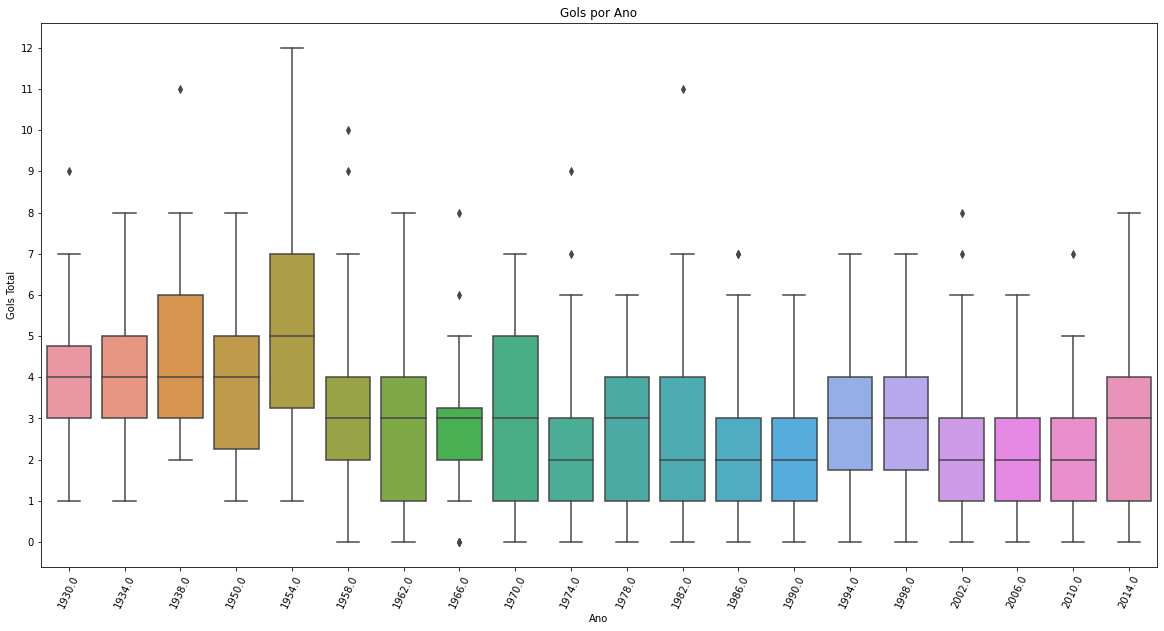

In [38]:
plt.figure(figsize = (20,10))
sns.boxplot(partidas['Ano'], partidas['Gols Total'])
plt.title('Gols por Ano')
plt.xticks(rotation=65)
plt.locator_params(axis='y', nbins=20)
plt.show()

## Gols por Copa do Mundo
---

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


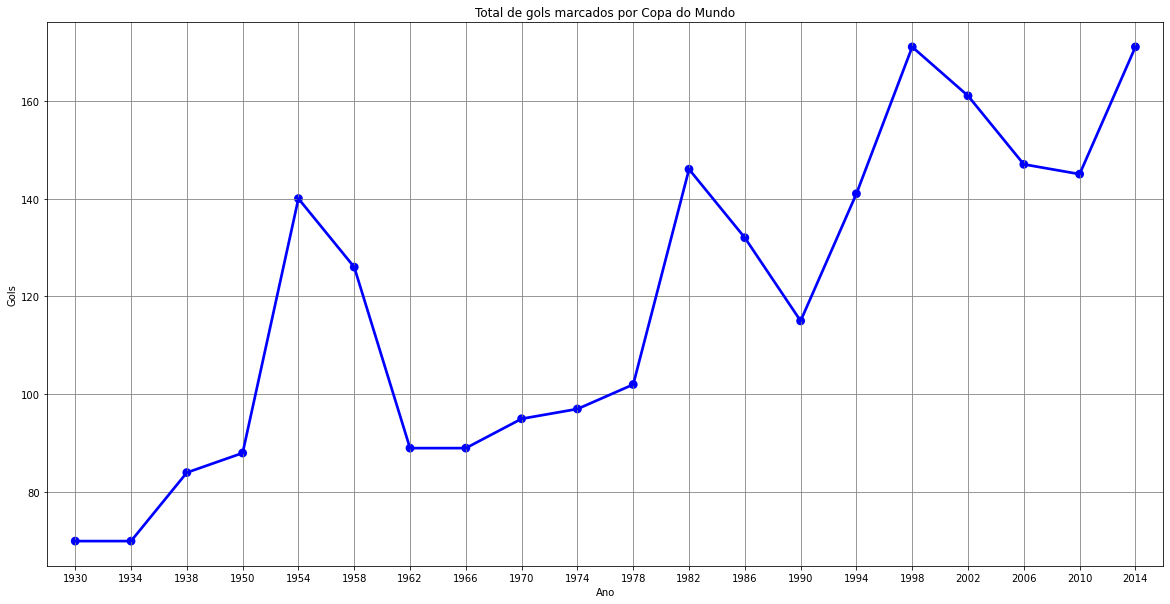

In [39]:
plt.figure(figsize =(20,10))
sns.pointplot(x = 'Ano', y = 'Gols', data = copas, color = 'blue')
plt.title('Total de gols marcados por Copa do Mundo')
plt.grid(True, color = 'grey')

# Calcular o total de gols marcados de cada seleção em todas as Copas do Mundo
---
> Primeiro como mandante


In [40]:
mandante = partidas.groupby('Time1')['GolTime1'].sum().reset_index()
mandante.columns = ['Time', 'Gols']
mandante.head()

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Time,Gols
0,Algeria,5.0
1,Angola,0.0
2,Argentina,109.0
3,Australia,7.0
4,Austria,31.0


> Como visitante

In [41]:
visitante = partidas.groupby('Time2')['GolTime2'].sum().reset_index()
visitante.columns = ["Time", 'Gols']
visitante.head()

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Time,Gols
0,Algeria,8.0
1,Angola,1.0
2,Argentina,22.0
3,Australia,4.0
4,Austria,12.0


In [42]:
total_gols = pd.concat([mandante,visitante], axis=0)
total_gols.sample(10)

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Time,Gols
38,Korea DPR,2.0
11,Chile,15.0
9,Cameroon,7.0
19,C�te d'Ivoire,5.0
19,C�te d'Ivoire,8.0
30,Ghana,9.0
31,Greece,1.0
32,Haiti,2.0
13,Colombia,17.0
70,Wales,2.0


In [43]:
# Conferindo gols da Suecia

total_gols[total_gols['Time']=='Sweden']

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Time,Gols
62,Sweden,53.0
67,Sweden,21.0


In [44]:
#Agrupar o dataframe completo

total_gols = total_gols.groupby ('Time')['Gols'].sum().reset_index()
total_gols[total_gols['Time'] == 'Sweden']

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Time,Gols
67,Sweden,74.0


In [45]:
#transformando em inteiro
total_gols['Gols'] = total_gols['Gols'].astype(int)

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


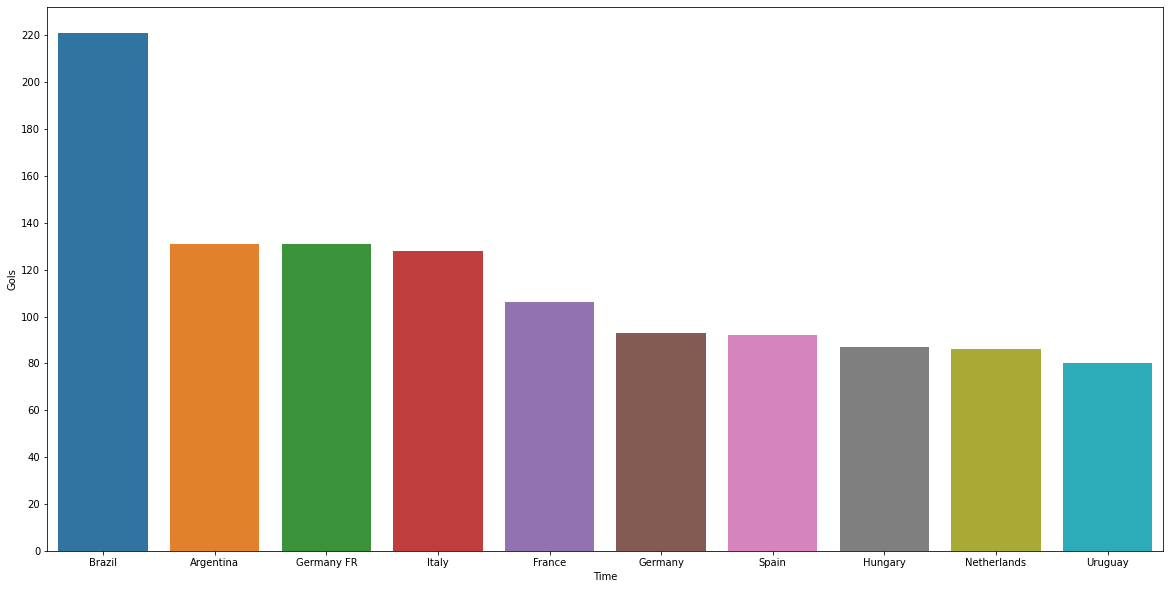

In [46]:
#Visualizando melhor o dataframe

total_gols = total_gols.sort_values(by = 'Gols', ascending = False)

plt.figure(figsize=(20,10))
sns.barplot(x='Time', y='Gols', data = total_gols[:10])
plt.locator_params(axis= 'y', nbins=20)
plt.show()

In [47]:
copas = copas.dropna()

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
copas

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ano,Sede,Vencedores,Vices,TerceiroLugar,QuartoLugar,Gols,Selecoes,Jogos,Público
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\batestin1\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vencedores', ylabel='count'>

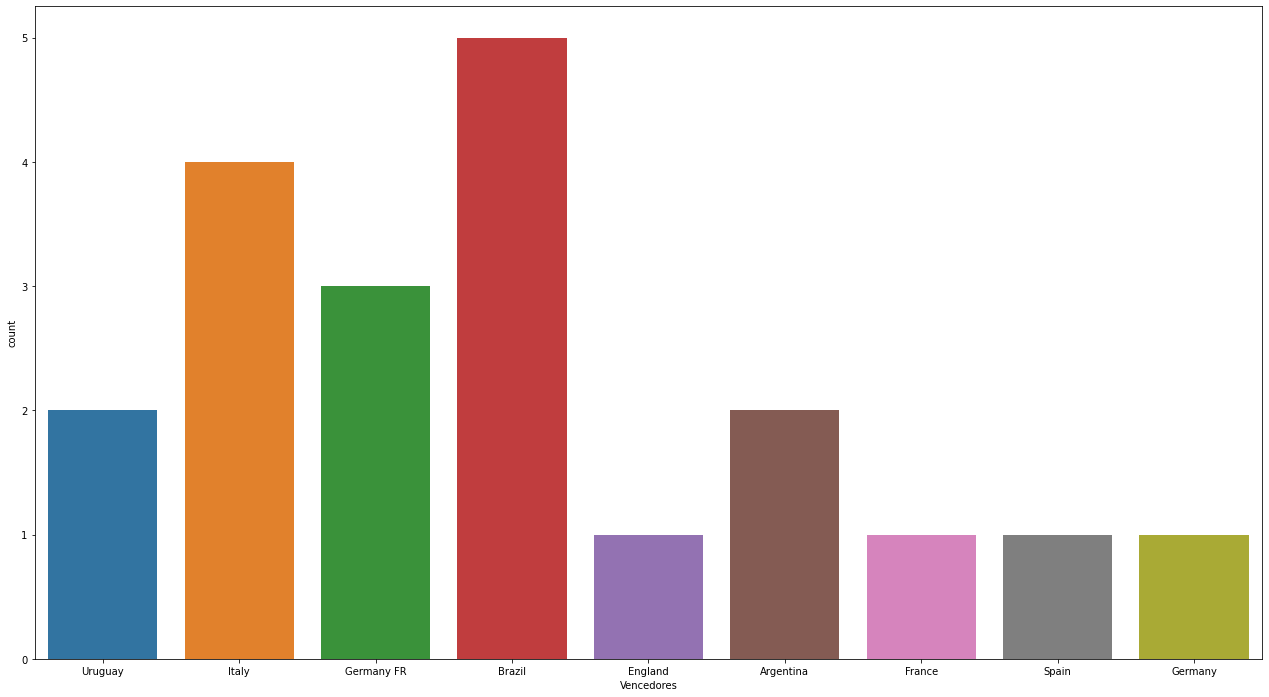

In [49]:
vencedores = copas.sort_values(by = 'Vencedores', ascending = False)
plt.figure(figsize=(22,12))
sns.countplot(copas.Vencedores)

In [50]:
# Substituindo alguns nomes de paises como União Sovietica para Rússia e unificando alemanhas

def replace_nome(df):
    if(df['Time1'] in ['German DR', 'Germany FR']):
        df['Time1'] = 'Germany'
    elif(df['Time1'] == 'Soviet Union'):
        df['Time1'] = 'Russia'
    
    if(df['Time2'] in ['German DR', 'Germany FR']):
        df['Time2'] = 'Germany'
    elif(df['Time2'] == 'Soviet Union'):
        df['Time2'] = 'Russia'
    return df

partidas = partidas.apply(replace_nome, axis='columns')

partidas
            

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ano,Dia do Jogo,Fase,Estadio,Cidade,Time1,GolTime1,GolTime2,Time2,Condicoes,...,GolsCasaIntervalo,GolsIntervalo,Juiz,Assistente1,Assistente2,RodadaID,PartidaID,SiglasAnfitriao,SiglasVisitante,Gols Total
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,...,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL,1.0
832,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,...,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX,3.0
833,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),...,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE,2.0
834,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,...,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI,1.0


In [51]:
#Criando um dicionário do Futebol

selecao = {}
index = 0
for idx, row in partidas.iterrows():
    nome = row['Time1']
    if(nome not in selecao.keys()):
        selecao[nome] = index
        index +=1
    nome = row['Time2']
    if(nome not in selecao.keys()):
        selecao[nome] = index
        index += 1
        
selecao

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'France': 0,
 'Mexico': 1,
 'USA': 2,
 'Belgium': 3,
 'Yugoslavia': 4,
 'Brazil': 5,
 'Romania': 6,
 'Peru': 7,
 'Argentina': 8,
 'Chile': 9,
 'Bolivia': 10,
 'Paraguay': 11,
 'Uruguay': 12,
 'Austria': 13,
 'Hungary': 14,
 'Egypt': 15,
 'Switzerland': 16,
 'Netherlands': 17,
 'Sweden': 18,
 'Germany': 19,
 'Spain': 20,
 'Italy': 21,
 'Czechoslovakia': 22,
 'Dutch East Indies': 23,
 'Cuba': 24,
 'Norway': 25,
 'Poland': 26,
 'England': 27,
 'Scotland': 28,
 'Turkey': 29,
 'Korea Republic': 30,
 'Russia': 31,
 'Wales': 32,
 'Northern Ireland': 33,
 'Colombia': 34,
 'Bulgaria': 35,
 'Korea DPR': 36,
 'Portugal': 37,
 'Israel': 38,
 'Morocco': 39,
 'El Salvador': 40,
 'Australia': 41,
 'Zaire': 42,
 'Haiti': 43,
 'Tunisia': 44,
 'IR Iran': 45,
 'Iran': 46,
 'Cameroon': 47,
 'New Zealand': 48,
 'Algeria': 49,
 'Honduras': 50,
 'Kuwait': 51,
 'Canada': 52,
 'Iraq': 53,
 'Denmark': 54,
 'rn">United Arab Emirates': 55,
 'Costa Rica': 56,
 'rn">Republic of Ireland': 57,
 'Saudi Arabia': 58,
 

In [52]:
# Deletando Colunas
partidasDeletadas = partidas.drop(['Dia do Jogo', 'Estadio', 'Juiz', 'Assistente1', 'Assistente2', 'RodadaID', 'Condicoes', 'SiglasAnfitriao', 'GolsCasaIntervalo', 'GolsIntervalo', 'Cidade', 'PartidaID', 'Fase', 'publico'], 1)

In [53]:
# Criando uma Serie co o numero de vezes que uma Seleção fo Campeã
campeoes = copas['Vencedores'].map(lambda p: 'Germany' if p=='Germany FR' else p).value_counts()
campeoes

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
France       1
Spain        1
England      1
Name: Vencedores, dtype: int64

In [54]:
#Adicionando Sedes que Foram Campeãs e Seleções que foram Campeãs

partidasDeletadas['Selecao Anfitriã Vencedora'] = 0
partidasDeletadas['Selecao Visitante Vencedora'] = 0

def contagem_de_vencedores(cv):
    if(campeoes.get(cv['Time1']) != None):
        cv['Selecao Anfitriã Vencedora'] = campeoes.get(cv['Time1'])
    if(campeoes.get(cv['Time2']) != None):
        cv['Selecao Visitante Vencedora'] = campeoes.get(cv['Time2'])
    return cv

partidasDeletadas = partidasDeletadas.apply(contagem_de_vencedores, axis = 'columns')

NovaPartida = partidasDeletadas
NovaPartida

,Ano,Time1,GolTime1,GolTime2,Time2,SiglasVisitante,Gols Total,Selecao Anfitriã Vencedora,Selecao Visitante Vencedora
0,1930.0,France,4.0,1.0,Mexico,MEX,5.0,1,0
1,1930.0,USA,3.0,0.0,Belgium,BEL,3.0,0,0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,BRA,3.0,0,5
3,1930.0,Romania,3.0,1.0,Peru,PER,4.0,0,0
4,1930.0,Argentina,1.0,0.0,France,FRA,1.0,2,1
...,...,...,...,...,...,...,...,...,...
831,2014.0,Argentina,1.0,0.0,Belgium,BEL,1.0,2,0
832,2014.0,Netherlands,2.0,1.0,Mexico,MEX,3.0,0,0
833,2014.0,Costa Rica,1.0,1.0,Greece,GRE,2.0,0,0
834,2014.0,Argentina,1.0,0.0,Switzerland,SUI,1.0,2,0


In [55]:
# Encontrando quem venceu em casa e quem venceu fora de casa

NovaPartida['Vencedores'] = '-'

def encontrando_vencedor(ec):
    if(int(ec['GolTime1']) == int(ec['GolTime2'])):
        ec['Vencedores'] = 0
    elif(int(ec['GolTime1']) > int(ec['GolTime2'])):
        ec['Vencedores'] = 1
    else:
        ec['Vencedores'] = 2
    return ec

NovaPartida = NovaPartida.apply(encontrando_vencedor, axis = 'columns')

NovaPartida


C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ano,Time1,GolTime1,GolTime2,Time2,SiglasVisitante,Gols Total,Selecao Anfitriã Vencedora,Selecao Visitante Vencedora,Vencedores
0,1930.0,France,4.0,1.0,Mexico,MEX,5.0,1,0,1
1,1930.0,USA,3.0,0.0,Belgium,BEL,3.0,0,0,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,BRA,3.0,0,5,1
3,1930.0,Romania,3.0,1.0,Peru,PER,4.0,0,0,1
4,1930.0,Argentina,1.0,0.0,France,FRA,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
831,2014.0,Argentina,1.0,0.0,Belgium,BEL,1.0,2,0,1
832,2014.0,Netherlands,2.0,1.0,Mexico,MEX,3.0,0,0,1
833,2014.0,Costa Rica,1.0,1.0,Greece,GRE,2.0,0,0,0
834,2014.0,Argentina,1.0,0.0,Switzerland,SUI,1.0,2,0,1


In [56]:
# substituindo o nome do ID pelo nome que criamos no dicionário

def substituicao(s):
    s['Time1'] = selecao[s['Time1']]
    s['Time2'] = selecao[s['Time2']]
    return s

NovaPartida2 = NovaPartida.apply(substituicao, axis = 'columns')
NovaPartida2


#Criando um dicionário do Futebol



C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ano,Time1,GolTime1,GolTime2,Time2,SiglasVisitante,Gols Total,Selecao Anfitriã Vencedora,Selecao Visitante Vencedora,Vencedores
0,1930.0,0,4.0,1.0,1,MEX,5.0,1,0,1
1,1930.0,2,3.0,0.0,3,BEL,3.0,0,0,1
2,1930.0,4,2.0,1.0,5,BRA,3.0,0,5,1
3,1930.0,6,3.0,1.0,7,PER,4.0,0,0,1
4,1930.0,8,1.0,0.0,0,FRA,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
831,2014.0,8,1.0,0.0,3,BEL,1.0,2,0,1
832,2014.0,17,2.0,1.0,1,MEX,3.0,0,0,1
833,2014.0,56,1.0,1.0,59,GRE,2.0,0,0,0
834,2014.0,8,1.0,0.0,16,SUI,1.0,2,0,1


In [57]:
#retirando mais algumas colunas
NovaPartida2 = NovaPartida2.drop(['Ano', 'GolTime1', 'GolTime2'],1)
NovaPartida2

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Time1,Time2,SiglasVisitante,Gols Total,Selecao Anfitriã Vencedora,Selecao Visitante Vencedora,Vencedores
0,0,1,MEX,5.0,1,0,1
1,2,3,BEL,3.0,0,0,1
2,4,5,BRA,3.0,0,5,1
3,6,7,PER,4.0,0,0,1
4,8,0,FRA,1.0,2,1,1
...,...,...,...,...,...,...,...
831,8,3,BEL,1.0,2,0,1
832,17,1,MEX,3.0,0,0,1
833,56,59,GRE,2.0,0,0,0
834,8,16,SUI,1.0,2,0,1


# TREINANDO O MODELO

In [58]:
X = NovaPartida2.loc[:,['Time1', 'Time2', 'Selecao Anfitriã Vencedora', 'Selecao Visitante Vencedora']]
X = np.array(X).astype('float64')

_X = X.copy()

_X[:,0] = X[:,1]
_X[:,1] = X[:,2]
_X[:,2] = X[:,3]
_X[:,3] = X[:,2]

y = NovaPartida.loc[:,['Vencedores']]
y = np.array(y).astype('int')
y = np.reshape(y,(1,836))
y = y[0]

_y = y.copy()

for i in range(len(_y)):
    if(_y[i] == 1):
        _y[i] = 2
    elif(_y[i] == 2):
        _y[i] = 1


X  = np.concatenate((X,_X), axis = 0)
y = np.concatenate((y,_y))



C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
from sklearn.utils import shuffle
X,y = shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(y_train)

[2 2 2 ... 0 2 1]


In [60]:
from sklearn.svm import SVC

param_grid = {'C': [1e3],
              'gama': [0.0001]}
svm_model = SVC(kernel = 'rbf', class_weight = 'balanced', probability= True)
svm_model.fit(X, y)

SVC(class_weight='balanced', probability=True)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

print('Prevendo o resultado do teste')

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_teste, y_pred, labels = range(3)))

Prevendo o resultado do teste
              precision    recall  f1-score   support

           0       0.42      0.13      0.20       106
           1       0.63      0.56      0.59       154
           2       0.54      0.85      0.66       158

    accuracy                           0.56       418
   macro avg       0.53      0.52      0.49       418
weighted avg       0.54      0.56      0.52       418



C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'y_teste' is not defined

In [62]:
def predicao(time1,time2):
    id1 =selecao[time1]
    id2 =selecao[time2]
    campeao1 = campeoes.get(time1) if campeoes.get(time1) != None else 0
    campeao2 = campeoes.get(time2) if campeoes.get(time2) != None else 0
    
    x = np.array([id1, id2, campeao1,campeao2]).astype('float64')
    x = np.reshape(x, (1,-1))
    _y = svm_model.predict_proba(x)[0]
    
    text = ('Chance para '+time1+ ' vencer ' +time2+ ' é {}\n Chance para '+time2+ ' vencer ' +time1 + ' é {}\n Chance para ' + time1 + ' e '+ time2 + ' por {} ').format(_y[1]*100,_y[2]*100,_y[0]*100)
    return _y[0], text

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
sele1 = input('Escolha uma seleção: ')
sele2 = input('Escolha outra seleção: ')

prob1, text1 = predicao(sele1, sele2)
print(text1)

C:\Users\batestin1\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Escolha uma seleção: USA
Escolha outra seleção: Brazil
Chance para USA vencer Brazil é 22.22595709489353
 Chance para Brazil vencer USA é 54.98420580424869
 Chance para USA e Brazil por 22.789837100857756 
